In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch betweeb 'default' and 'ignore'

''' Set debug flag to view extended error messages; else set it to False to turn off debugging mode '''
debug = True

# Load Data

## Establish DB connection

In [2]:
import findspark
findspark.init('/opt/spark/spark-3.2.1-bin-hadoop3.2')
from pyspark.sql import SparkSession

# the Spark session should be instantiated as follows
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.jars", "/opt/spark/spark-3.2.1-bin-hadoop3.2/jars/postgresql-42.3.5.jar") \
    .getOrCreate()
#    .config("spark.jars", "postgresql-42.2.10-1.jar") \
print("Connection complete! ready to load data.")

22/06/05 16:51:21 WARN Utils: Your hostname, AMDFX8520 resolves to a loopback address: 127.0.1.1; using 192.168.1.51 instead (on interface enp2s0)
22/06/05 16:51:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/06/05 16:51:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/05 16:51:24 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Connection complete! ready to load data.


## Load and View Schema

In [3]:
print("Wait a moment, retrieving data ...")
load_sdf = spark.read.format("jdbc"). \
options(
    url='jdbc:postgresql://10.11.34.33:5432/Datascience', # jdbc:postgresql://<host>:<port>/<database>
    dbtable='_issuefix_bkdata.customerbookings',
    user='postgres',
    password='postgres',
    driver='org.postgresql.Driver').\
load()
load_sdf.printSchema()

print("Loading complete!")

Wait a moment, retrieving data ...
root
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- hotel_name: string (nullable = true)
 |-- hotel_city: string (nullable = true)
 |-- hotel_state: string (nullable = true)
 |-- hotel_country: string (nullable = true)
 |-- checkin_date: date (nullable = true)
 |-- checkout_date: date (nullable = true)
 |-- num_of_nights: integer (nullable = true)
 |-- booked_date: date (nullable = true)
 |-- num_of_rooms: integer (nullable = true)
 |-- daily_rate: double (nullable = true)
 |-- booked_currency: string (nullable = true)

Loading complete!


In [4]:
load_sdf.show(n=2, vertical=True)

-RECORD 0--------------------------------
 customer_city    | Palma                
 customer_state   |                      
 customer_country | Spain                
 hotel_name       | Best Western Plus... 
 hotel_city       | Bryce Canyon         
 hotel_state      | Utah                 
 hotel_country    | USA                  
 checkin_date     | 2021-10-07           
 checkout_date    | 2021-10-09           
 num_of_nights    | 2                    
 booked_date      | 2021-09-11           
 num_of_rooms     | 1                    
 daily_rate       | 338.32               
 booked_currency  | USD                  
-RECORD 1--------------------------------
 customer_city    | Aventura             
 customer_state   |                      
 customer_country | USA                  
 hotel_name       | Hilton Fort Laude... 
 hotel_city       | Fort Lauderdale      
 hotel_state      | Florida              
 hotel_country    | USA                  
 checkin_date     | 2021-05-28    

### Convert to Pandas Dataframe

In [5]:
import pandas as pd
#numpy.random.bit_generator = numpy.random._bit_generator

print("Wait a moment while convert loaded data to a dataframe ...")
to_load_pdf = load_sdf.toPandas()
print(to_load_pdf.info())
print(to_load_pdf.head(2))

Wait a moment while convert loaded data to a dataframe ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259418 entries, 0 to 259417
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_city     259418 non-null  object 
 1   customer_state    259358 non-null  object 
 2   customer_country  259418 non-null  object 
 3   hotel_name        259418 non-null  object 
 4   hotel_city        259418 non-null  object 
 5   hotel_state       259418 non-null  object 
 6   hotel_country     259418 non-null  object 
 7   checkin_date      259418 non-null  object 
 8   checkout_date     259418 non-null  object 
 9   num_of_nights     259418 non-null  int32  
 10  booked_date       259418 non-null  object 
 11  num_of_rooms      259418 non-null  int32  
 12  daily_rate        259418 non-null  float64
 13  booked_currency   259418 non-null  object 
dtypes: float64(1), int32(2), object(11)
memory usage: 25.7+ MB
None
  customer_city customer_state customer_country  \
0

### Analyse Stats

In [97]:
import sys
sys.path.insert(1, '../wrangler')
import pandas as pd
import stats as ds
import json

#import importlib

if debug:
    import importlib
    ds = importlib.reload(ds)

data_name = "traveller"
cls_stats = ds.DataStatistics(name=data_name)
print(dir(cls_stats))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dist_types', '_distributions', '_dup_method', '_l_dup_methods', 'count_duplicates', 'count_nulls', 'fit_distributions', 'get_central_tendency', 'get_data_types', 'name', 'test_uniformity']


In [45]:
%%capture
import pandas as pd

stat_summary_df = pd.DataFrame([])
stat_summary_df = cls_stats.fit_distributions(to_load_pdf,["popular"])

In [47]:
print(stat_summary_df)

         distr      score  LLE            loc          scale  \
0   genextreme   0.127618  NaN       1.617076       0.907597   
1        expon   0.129034  NaN            1.0       1.838296   
2       pareto   0.151473  NaN      -0.304145       1.304145   
3        gamma   0.162114  NaN            1.0       4.019531   
4         beta   0.199609  NaN            1.0     176.565283   
5     dweibull   0.243212  NaN       2.527018        1.58273   
6            t   0.264159  NaN       2.404165        1.33507   
7         norm   0.294027  NaN       2.838296       2.092641   
8     loggamma   0.297136  NaN    -551.251433      77.332164   
9      lognorm   0.524361  NaN            1.0       0.000046   
10     uniform   0.542994  NaN            1.0           29.0   
0        expon  13.461062  NaN            1.0       0.030854   
1     dweibull  14.121208  NaN            1.0       0.164265   
2         norm  14.702736  NaN       1.030854       0.221947   
3     loggamma  17.032895  NaN     -76.9

## Drop columns

In [6]:
to_load_pdf = to_load_pdf.drop('customer_state',axis=1)

## Set data types

In [7]:
print("Wait a moment while we polish the dataframe ...")
#to_load_pdf = pd.DataFrame(list(zip(*_grp_book_collect))).T
#to_load_pdf = to_load_pdf.rename(columns={0 : 'Date', 1 : 'Nights', 2 : 'Rooms', 3 : 'AgentCost'})
to_load_pdf['customer_city'] = to_load_pdf['customer_city'].astype('string')
to_load_pdf['customer_country'] = to_load_pdf['customer_country'].astype('string')
to_load_pdf['hotel_name'] = to_load_pdf['hotel_name'].astype('string')
to_load_pdf['hotel_city'] = to_load_pdf['hotel_city'].astype('string')
to_load_pdf['hotel_state'] = to_load_pdf['hotel_state'].astype('string')
to_load_pdf['booked_date'] = to_load_pdf['booked_date'].astype('datetime64[ns]')
to_load_pdf['checkin_date'] = to_load_pdf['checkin_date'].astype('datetime64[ns]')
to_load_pdf['checkout_date'] = to_load_pdf['checkout_date'].astype('datetime64[ns]')
to_load_pdf['num_of_nights'] = to_load_pdf['num_of_nights'].astype('int64')
to_load_pdf['num_of_rooms'] = to_load_pdf['num_of_rooms'].astype('int64')
to_load_pdf['daily_rate'] = to_load_pdf['daily_rate'].astype('float64')
to_load_pdf['booked_value'] = round(to_load_pdf['num_of_nights']* \
                                to_load_pdf['num_of_rooms']* \
                                to_load_pdf['daily_rate'].astype('float64'),2)
to_load_pdf['booked_currency'] = to_load_pdf['booked_currency'].astype('string')
to_load_pdf.info()


Wait a moment while we polish the dataframe ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259418 entries, 0 to 259417
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_city     259418 non-null  string        
 1   customer_country  259418 non-null  string        
 2   hotel_name        259418 non-null  string        
 3   hotel_city        259418 non-null  string        
 4   hotel_state       259418 non-null  string        
 5   hotel_country     259418 non-null  object        
 6   checkin_date      259418 non-null  datetime64[ns]
 7   checkout_date     259418 non-null  datetime64[ns]
 8   num_of_nights     259418 non-null  int64         
 9   booked_date       259418 non-null  datetime64[ns]
 10  num_of_rooms      259418 non-null  int64         
 11  daily_rate        259418 non-null  float64       
 12  booked_currency   259418 non-null  string        
 13  booked_valu

## Group the data

In [9]:
import numpy as np

grp_by_dt = to_load_pdf.groupby(['checkin_date',
                                 'customer_city',
                                 'customer_country',
                                 'hotel_city',
                                 'hotel_country']). \
                agg({'booked_value': ['sum', 'mean', 'min', 'max', 'std']})
grp_by_dt = grp_by_dt.round(2)
grp_by_dt.columns = ['value_sum', 'value_mean', 'value_min', 'value_max', 'value_stdv']
grp_by_dt['value_stdv'] = grp_by_dt['value_stdv'].fillna(0)
grp_by_dt['customer_city_lat'] = np.nan
grp_by_dt['customer_city_lon'] = np.nan
grp_by_dt['hotel_city_lat'] = np.nan
grp_by_dt['hotel_city_lon'] = np.nan
grp_by_dt = grp_by_dt.reset_index()
print(grp_by_dt)

       checkin_date customer_city customer_country        hotel_city  \
0        2021-01-01        Dorset   United Kingdom         Las Vegas   
1        2021-01-01        Dorset   United Kingdom          Portland   
2        2021-01-01     Grapevine              USA            Austin   
3        2021-01-01     Grapevine              USA      Coral Gables   
4        2021-01-01     Grapevine              USA         Las Vegas   
...             ...           ...              ...               ...   
142135   2023-10-08      Aventura              USA  Lake Buena Vista   
142136   2023-10-19        Dublin          Ireland           Orlando   
142137   2023-10-26   West Sussex   United Kingdom           Orlando   
142138   2023-11-03         Essex   United Kingdom           Orlando   
142139   2023-11-06        Dublin          Ireland  Lake Buena Vista   

       hotel_country  value_sum  value_mean  value_min  value_max  value_stdv  \
0                USA    1466.84      733.42     620.84

## Add lat/lon to cities
__SKIP THIS LOAD FROM CSV__

In [40]:
''' Import the required library '''
from geopy.geocoders import Nominatim

customer_city = grp_by_dt["customer_city"].unique()
hotel_city = grp_by_dt["hotel_city"].unique()
_l_cities = list(set().union(customer_city, hotel_city))

''' Initialize Nominatim API '''
geolocator = Nominatim(user_agent="Traveller")
''' loop through list to allocate lat/lon pairs '''
_l_city_loc = []
_l_city_err = []
for city in _l_cities:
    try:
#        print(city)
        location = geolocator.geocode(city)
        if location != None:
            _l_city_loc.append([city,location.latitude,location.longitude])
        else:
            _l_city_err.append(city)
            raise ValueError("Error: geocode failed on input %s with message" % city)
    except ValueError as error_message:
#        print("Error: geocode failed on input %s with message %s"%(city, error_message))
        print(error_message)
        pass
#print("The latitude of the location is: ", location.latitude)
#print("The longitude of the location is: ", location.longitude)


/usr/lib/python3.8/socket.py:740: ResourceWarning: unclosed <socket.socket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.235.83', 42154), raddr=('140.211.167.100', 443)>
  self._sock = None


In [44]:
import csv

fields = ['City', 'Latitude', 'Longitude'] 
with open('../data/city_locations.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(_l_city_loc)

In [56]:
city_loc_df = pd.read_csv("../data/city_locations.csv")
for rowIdx in city_loc_df.index:
    ''' match and assign lat/lon for customer cities '''
    mask = grp_by_dt['customer_city'] == city_loc_df["City"][rowIdx]
    grp_by_dt['customer_city_lat'][mask] = city_loc_df["Latitude"][rowIdx]
    grp_by_dt['customer_city_lon'][mask] = city_loc_df["Longitude"][rowIdx]
    ''' match and assign lat/lon for hotel cities '''
    mask = grp_by_dt['hotel_city'] == city_loc_df["City"][rowIdx]
    grp_by_dt['hotel_city_lat'][mask] = city_loc_df["Latitude"][rowIdx]
    grp_by_dt['hotel_city_lon'][mask] = city_loc_df["Longitude"][rowIdx]

print("Attempt to assign lat/lon to %d" % grp_by_dt.shape[0])

''' drop all cells without lat/lon pairs; i.e; NaN '''
mask = (grp_by_dt['customer_city_lat'].notna() | grp_by_dt['customer_city_lat'])
grp_by_dt = grp_by_dt[mask]
mask = (grp_by_dt['hotel_city_lat'].notna() | grp_by_dt['hotel_city_lon'])
grp_by_dt = grp_by_dt[mask]

print("Successfully assigned lat/lon to %d" % grp_by_dt.shape[0])

''' write to a csv '''
grp_by_dt.to_csv('../data/travel_from_to.csv',sep=',',index=False)

/tmp/ipykernel_53604/2726236268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_by_dt['customer_city_lat'][mask] = city_loc_df["Latitude"][rowIdx]
/tmp/ipykernel_53604/2726236268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_by_dt['customer_city_lon'][mask] = city_loc_df["Longitude"][rowIdx]
/tmp/ipykernel_53604/2726236268.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_by_dt['hotel_city_lat'][mask] = city_loc

Attempt to assign lat/lon to 142138
Successfully assigned lat/lon to 142138


## Where are they from where are they going

In [2]:
''' load data from CSV '''
import pandas as pd

grp_by_dt = pd.read_csv("../data/travel_from_to.csv")
print("Retrieved %d rows from CSV" % (grp_by_dt.shape[0]))
grp_by_dt = grp_by_dt.drop('Unnamed: 0',axis=1)

grp_by_dt['checkin_date'] = grp_by_dt['checkin_date'].astype('datetime64[ns]')
grp_by_dt['customer_city'] = grp_by_dt['customer_city'].astype('string')
grp_by_dt['customer_country'] = grp_by_dt['customer_country'].astype('string')
grp_by_dt['customer_city_lat'] = grp_by_dt['customer_city_lat'].astype('float64')
grp_by_dt['customer_city_lon'] = grp_by_dt['customer_city_lon'].astype('float64')
grp_by_dt['hotel_city'] = grp_by_dt['hotel_city'].astype('string')
grp_by_dt['hotel_country'] = grp_by_dt['hotel_country'].astype('string')
grp_by_dt['hotel_city_lat'] = grp_by_dt['hotel_city_lat'].astype('float64')
grp_by_dt['hotel_city_lon'] = grp_by_dt['hotel_city_lon'].astype('float64')
grp_by_dt['value_sum'] = grp_by_dt['value_sum'].astype('float64')
grp_by_dt['value_mean'] = grp_by_dt['value_mean'].astype('float64')
grp_by_dt['value_stdv'] = grp_by_dt['value_stdv'].astype('float64')
grp_by_dt['value_min'] = grp_by_dt['value_min'].astype('float64')
grp_by_dt['value_max'] = grp_by_dt['value_max'].astype('float64')

grp_by_dt.info()

Retrieved 142138 rows from CSV
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142138 entries, 0 to 142137
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   checkin_date       142138 non-null  datetime64[ns]
 1   customer_city      142138 non-null  string        
 2   customer_country   142138 non-null  string        
 3   hotel_city         142138 non-null  string        
 4   hotel_country      142138 non-null  string        
 5   value_sum          142138 non-null  float64       
 6   value_mean         142138 non-null  float64       
 7   value_min          142138 non-null  float64       
 8   value_max          142138 non-null  float64       
 9   value_stdv         142138 non-null  float64       
 10  customer_city_lat  142138 non-null  float64       
 11  customer_city_lon  142138 non-null  float64       
 12  hotel_city_lat     142138 non-null  float64       
 13  hotel_city_lo

## Filter the data
Set the parameter values and run the cell to filter the data.
* Start date
* End date
* City
* Country

In [26]:
''' Filter data '''
import datetime

start_dt = datetime.datetime(2021,1,1)
end_dt = datetime.datetime(2021,3,30)
source_country = []   # e.g. "USA","United Kingdom"
source_city = []      # e.g. "Grapevine"
sink_country = []     # e.g. "USA"
sink_city = ["Las Vegas","Portland","Orlando"]        # e.g. "Las Vegas","Portland","Orlando"

filltered_df = grp_by_dt.copy()
''' >= start-date '''
if isinstance(start_dt, datetime.date):
    mask = (filltered_df["checkin_date"] >= start_dt)
    filltered_df = filltered_df[mask]
print("Filter selected %d rows" % filltered_df.shape[0])
''' <= end-date '''
if isinstance(end_dt, datetime.date):
    mask = (filltered_df["checkin_date"] <= end_dt)
    filltered_df = filltered_df[mask]
print("Filter selected %d rows" % filltered_df.shape[0])
''' in list of customer countries '''
if isinstance(source_country,list) and len(source_country)>0:
    filltered_df = filltered_df[filltered_df['customer_country'].isin(source_country)]
''' in list of customer cities '''
if isinstance(source_city,list) and len(source_city)>0:
    filltered_df = filltered_df[filltered_df['customer_city'].isin(source_city)]
''' in list of hotel countries '''
if isinstance(sink_country, list) and len(sink_country)>0:
    filltered_df = filltered_df[filltered_df['hotel_country'].isin(sink_country)]
''' in list of hotel cities '''
if isinstance(sink_city, list) and len(sink_city):
    filltered_df = filltered_df[filltered_df['hotel_city'].isin(sink_city)]

print("Filter selected %d rows" % filltered_df.shape[0])

Filter selected 142138 rows
Filter selected 15228 rows
Filter selected 1896 rows


## Build the graph
Build the traveller (source) and hotel (sink) based on the filtered data.

In [27]:
import networkx as nx

g_df = filltered_df.copy()
print("Build graph for dataframe with %d rows" % g_df.shape[0])

source_g_df = g_df.groupby(['customer_city','customer_country','customer_city_lat','customer_city_lon']). \
                agg({'value_sum': ['sum', 'mean', 'min', 'max', 'std']})
source_g_df.columns = ['value_sum', 'value_mean', 'value_min', 'value_max', 'value_stdv']
source_g_df=source_g_df.reset_index()
source_g_df.to_csv("../data/source.csv")
print("Number of custmer nodes: ", source_g_df.shape[0])

sink_g_df = g_df.groupby(['hotel_city','hotel_country','hotel_city_lat','hotel_city_lon']). \
                agg({'value_sum': ['sum', 'mean', 'min', 'max', 'std']})
sink_g_df.columns = ['value_sum', 'value_mean', 'value_min', 'value_max', 'value_stdv']
sink_g_df=sink_g_df.reset_index()
print("Number of hotel nodes: ", sink_g_df.shape[0])

g_travel = nx.Graph(name='Travel_from_to_destination') # Simple Digraph

''' customer nodes '''
for rowIdx in source_g_df.index:
#    g_travel.add_node(g_df.loc[rowIdx,'customer_city'],
    g_travel.add_node(source_g_df.loc[rowIdx,'customer_city'],
                      pos=(source_g_df.loc[rowIdx,'customer_city_lon'],
                           source_g_df.loc[rowIdx,'customer_city_lat']),
                      node_type = "source",
#                      checkin_date=source_g_df.loc[rowIdx,'checkin_date'],
                      city=source_g_df.loc[rowIdx,'customer_city'],
                      country=source_g_df.loc[rowIdx,'customer_country'],
                     )
''' hotel nodes '''
for rowIdx in sink_g_df.index:    
    g_travel.add_node(sink_g_df.loc[rowIdx,'hotel_city'],
#    g_travel.add_node('HC'+str(rowIdx),
                      pos=(sink_g_df.loc[rowIdx,'hotel_city_lon'],
                           sink_g_df.loc[rowIdx,'hotel_city_lat']),
                      node_type = "sink",
#                      checkin_date=sink_g_df.loc[rowIdx,'checkin_date'],
                      city=sink_g_df.loc[rowIdx,'hotel_city'],
                      country=sink_g_df.loc[rowIdx,'hotel_country'],
                     )
for rowIdx in g_df.index:
    g_travel.add_edge(g_df.loc[rowIdx,'customer_city'],
                      g_df.loc[rowIdx,'hotel_city'],
#                      checkin_date=g_df.loc[rowIdx,'checkin_date'],
                      value_sum=g_df.loc[rowIdx,'value_sum'],
                      value_mean=g_df.loc[rowIdx,'value_mean'],
                      value_stdv=g_df.loc[rowIdx,'value_stdv'],
                      value_min=g_df.loc[rowIdx,'value_min'],
                      value_max=g_df.loc[rowIdx,'value_max'],
                     )
print("Graph with %d nodes and %d edges" % (g_travel.number_of_nodes(), g_travel.number_of_edges()))    

Build graph for dataframe with 1896 rows
Number of custmer nodes:  61
Number of hotel nodes:  3
Graph with 62 nodes and 107 edges


## Plot the graph
Plot the traveller source and hotel sink associations

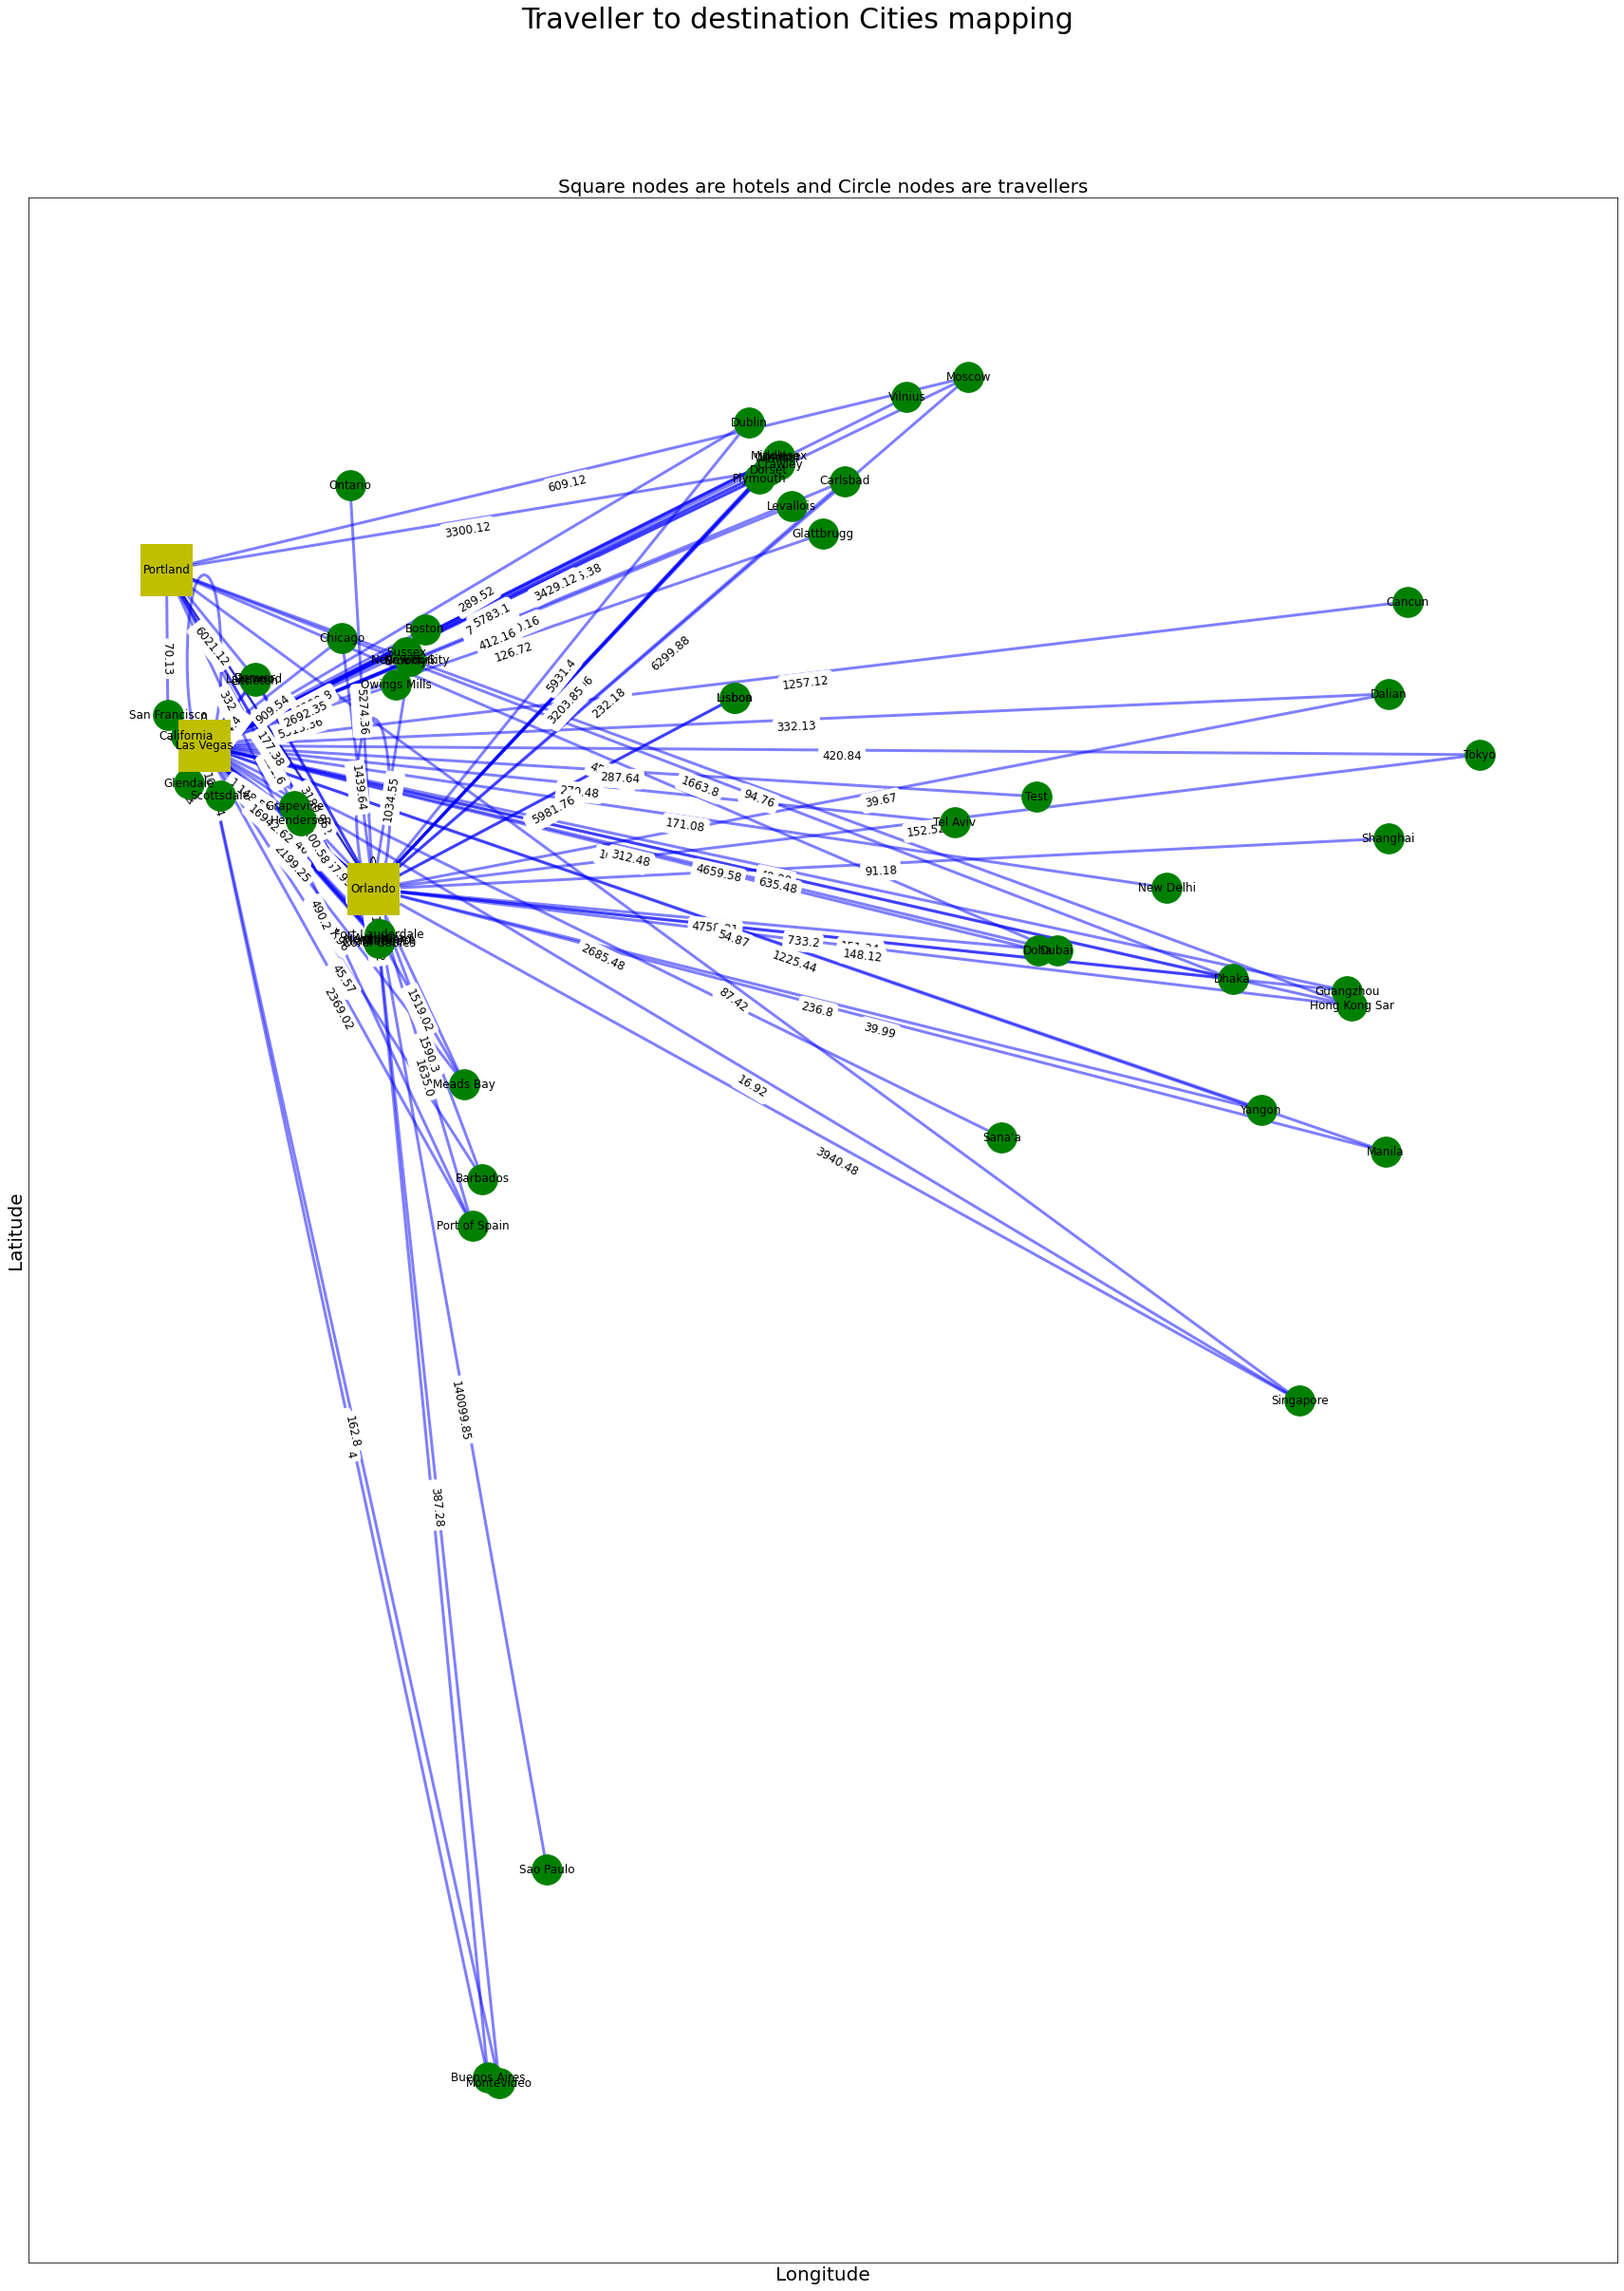

In [42]:
#from mpl_toolkits.basemap import Basemap as Basemap
#import sys
#sys.path.insert(1, '../')
#from basemap.packages import basemap as Basemap
#import basemap as Basemap
import matplotlib.pyplot as plt
%matplotlib inline


customer_nodes = [n for n,v in g_travel.nodes(data=True)
                  if v['node_type'] == "source"]
g_customer = g_travel.subgraph(customer_nodes)
hotel_nodes = [n for n,v in g_travel.nodes(data=True)
              if v['node_type'] == "sink"]
g_hotel = g_travel.subgraph(hotel_nodes)

#plt.figure(figsize = (20,20))
plt.figure(figsize=(30,40))

''' draw source nodes '''
node_pos=nx.get_node_attributes(g_customer,'pos')
node_size=1000
nx.draw_networkx(g_customer,
                 node_pos,
                 node_size=node_size,
                 node_color="g",
                 node_shape='o')
''' draw sink nodes'''
node_pos=nx.get_node_attributes(g_hotel,'pos')
node_size=3000
nx.draw_networkx(g_hotel,
                 node_pos,
                 node_size=node_size,
                 node_color="y",
                 node_shape='s')
node_pos=nx.get_node_attributes(g_travel,'pos')
_edge_labels = nx.get_edge_attributes(g_travel,'value_sum')
nx.draw_networkx_edges(
    g_travel, node_pos, width=3.0,
    alpha=0.5,edge_color="b")
nx.draw_networkx_edge_labels(
    g_travel, node_pos,
    edge_labels=_edge_labels, label_pos=0.5,
    font_size=12, font_family="Arial",
    horizontalalignment='center', verticalalignment='top')

_s_title = "Traveller to destination Cities mapping"
plt.suptitle(_s_title, fontsize=30, y=0.95)
plt.title('Square nodes are hotels and Circle nodes are travellers', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
xticks = [a[0] for a in list(node_pos.values())]
min_xtick = min(xticks)+1
max_xtick = max(xticks)-1

_s_plot_save_file = str("../images/traveller_destinations.png").replace(" ","_")
plt.savefig(_s_plot_save_file, bbox_inches='tight')

plt.show()

## Create Gephi Files

In [45]:
_l_node_cols = ['Id','Label','lat','lng','Type']
cust_node_df = pd.DataFrame([], columns=_l_node_cols)
hotel_node_df = pd.DataFrame([], columns=_l_node_cols)
_l_edge_cols = ["Source","Target","Type","Label","Weight"]
edges_df = pd.DataFrame([], columns=_l_edge_cols)
_l_nodes=[]
_l_edges=[]

for rowIdx in grp_by_dt.index:
    ''' build target node set '''
    _l_nodes.append([grp_by_dt.loc[rowIdx,'hotel_city'],
                     grp_by_dt.loc[rowIdx,'hotel_city'],
                     grp_by_dt.loc[rowIdx,'hotel_city_lat'],
                     grp_by_dt.loc[rowIdx,'hotel_city_lon'],
                     'target'])
    ''' build source node set '''
    _l_nodes.append([grp_by_dt.loc[rowIdx,'customer_city'],
                     grp_by_dt.loc[rowIdx,'customer_city'],
                     grp_by_dt.loc[rowIdx,'customer_city_lat'],
                     grp_by_dt.loc[rowIdx,'customer_city_lon'],
                     'source'])
    ''' build edge set '''
    _l_edges.append([
        grp_by_dt.loc[rowIdx,'customer_city'],
        grp_by_dt.loc[rowIdx,'hotel_city'],
        "directed",
        grp_by_dt.loc[rowIdx,'value_sum'],1])

nodes_df = pd.DataFrame(_l_nodes,columns=_l_node_cols)
nodes_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
edges_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
edges_df = pd.DataFrame(_l_edges,columns=_l_edge_cols)                  
nodes_df.to_csv('../data/nodes.csv',sep=';',index=False)
edges_df.to_csv('../data/edges.csv',sep=';',index=False)

In [41]:
#edges_df = pd.DataFrame(_l_edges,columns=_l_edge_cols)
nodes_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
nodes_df.to_csv('../data/nodes.csv',sep=';',index=False)
#edges_df.to_csv('../data/edges.csv',sep=';',index=False)

# Redundant (deprecate)

In [19]:
import networkx as nx

g_df = filltered_df.copy()

g_travel = nx.Graph(name='Travel_from_to_destination') # Simple Digraph
for rowIdx in g_df.index:
    ''' customer nodes '''
#    g_travel.add_node(g_df.loc[rowIdx,'customer_city'],
    g_travel.add_node('CC'+str(rowIdx),
                      pos=(g_df.loc[rowIdx,'customer_city_lat'],
                           g_df.loc[rowIdx,'customer_city_lon']),
                      node_type = "source",
                      checkin_date=g_df.loc[rowIdx,'checkin_date'],
                      city=g_df.loc[rowIdx,'customer_city'],
                      country=g_df.loc[rowIdx,'customer_country'],
                     )
    ''' hotel nodes '''
#    g_travel.add_node(g_df.loc[rowIdx,'hotel_city'],
    g_travel.add_node('HC'+str(rowIdx),
                      pos=(g_df.loc[rowIdx,'hotel_city_lat'],
                           g_df.loc[rowIdx,'hotel_city_lon']),
                      node_type = "sink",
                      checkin_date=g_df.loc[rowIdx,'checkin_date'],
                      city=g_df.loc[rowIdx,'hotel_city'],
                      country=g_df.loc[rowIdx,'hotel_country'],
                     )
    g_travel.add_edge('CC'+str(rowIdx),
                      'HC'+str(rowIdx),
                      checkin_date=g_df.loc[rowIdx,'checkin_date'],
                      value_sum=g_df.loc[rowIdx,'value_sum'],
                      value_mean=g_df.loc[rowIdx,'value_mean'],
                      value_stdv=g_df.loc[rowIdx,'value_stdv'],
                      value_min=g_df.loc[rowIdx,'value_min'],
                      value_max=g_df.loc[rowIdx,'value_max'],
                     )
print("Graph with %d nodes and %d edges" % (g_travel.number_of_nodes(), g_travel.number_of_edges()))

Graph with 2178 nodes and 1089 edges


In [4]:
customSchema = "_issuefix_bkdata"
print("Wait a moment, retrieving data ...")
booking_df = spark.read.format("jdbc") \
    .option("url", "jdbc:postgresql://10.11.34.33:5432/Datascience") \
    .option("dbtable", "_issuefix_bkdata.reservations") \
    .option("user", "postgres") \
    .option("password", "postgres") \
    .option("driver", "org.postgresql.Driver") \
    .load()
print("Loaded schema")
booking_df.printSchema()
print("Loading complete!")

Wait a moment, retrieving data ...
Loaded schema
root
 |-- vendor_uuid: string (nullable = true)
 |-- agent_name: string (nullable = true)
 |-- hotel_uuid: string (nullable = true)
 |-- hotel_name: string (nullable = true)
 |-- reserved_status: string (nullable = true)
 |-- reserved_datetime: string (nullable = true)
 |-- booking_for_datetime: date (nullable = true)
 |-- reserved_for_datetime: date (nullable = true)
 |-- check_in_date: date (nullable = true)
 |-- check_out_date: date (nullable = true)
 |-- number_of_nights: integer (nullable = true)
 |-- number_of_rooms: integer (nullable = true)
 |-- booking_type: string (nullable = true)
 |-- agent_booking_currency: string (nullable = true)
 |-- agent_daily_rate: double (nullable = true)
 |-- agent_total_cost: double (nullable = true)
 |-- hotel_currency: string (nullable = true)
 |-- hotel_daily_rate: float (nullable = true)
 |-- group_booking_type: string (nullable = true)

Loading complete!
